### Importando Librerias

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

**Apariencia gráfica**

In [46]:
%matplotlib inline
sns.set_theme(rc={"figure.figsize": [15,5]},
              style='dark')
sns.set_context(context='notebook')
plt.style.use('dark_background')

In [47]:
# Define the tickers and the period
tickers = ["ARB11841-USD", "MNT27075-USD", "OP-USD", "STRK22691-USD", "BLAST28480-USD", "ZK24091-USD", "TAIKO-USD", "MODE-USD"]
period = "max"

# Download the data
data = yf.download(tickers, start="2023-06-01")["Close"]

data.rename(columns={"ARB11841-USD":'ARB-USD',
                     "MNT27075-USD":"MNT-USD",
                     "STRK22691-USD":"STRK-USD",
                     "BLAST28480-USD": "BLAST-USD",
                     "ZK24091-USD":"ZK-USD"}, inplace=True)

[*********************100%***********************]  8 of 8 completed


In [48]:
data

Ticker,ARB-USD,BLAST-USD,MNT-USD,MODE-USD,OP-USD,STRK-USD,TAIKO-USD,ZK-USD
Date,,,,,,,,
2023-06-01 00:00:00+00:00,1.146976,NaN,NaN,NaN,1.387341,NaN,NaN,NaN
2023-06-02 00:00:00+00:00,1.240055,NaN,NaN,NaN,1.449385,NaN,NaN,NaN
2023-06-03 00:00:00+00:00,1.215460,NaN,NaN,NaN,1.483481,NaN,NaN,NaN
2023-06-04 00:00:00+00:00,1.210882,NaN,NaN,NaN,1.480396,NaN,NaN,NaN
2023-06-05 00:00:00+00:00,1.137949,NaN,NaN,NaN,1.390276,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-12-12 00:00:00+00:00,1.027322,0.011584,1.271497,0.040444,2.545664,0.660204,2.194990,0.234273
2024-12-13 00:00:00+00:00,1.018399,0.011359,1.260219,0.037873,2.551009,0.658008,2.075719,0.232706
2024-12-14 00:00:00+00:00,0.985088,0.010936,1.231998,0.044091,2.439004,0.623009,1.981064,0.224378


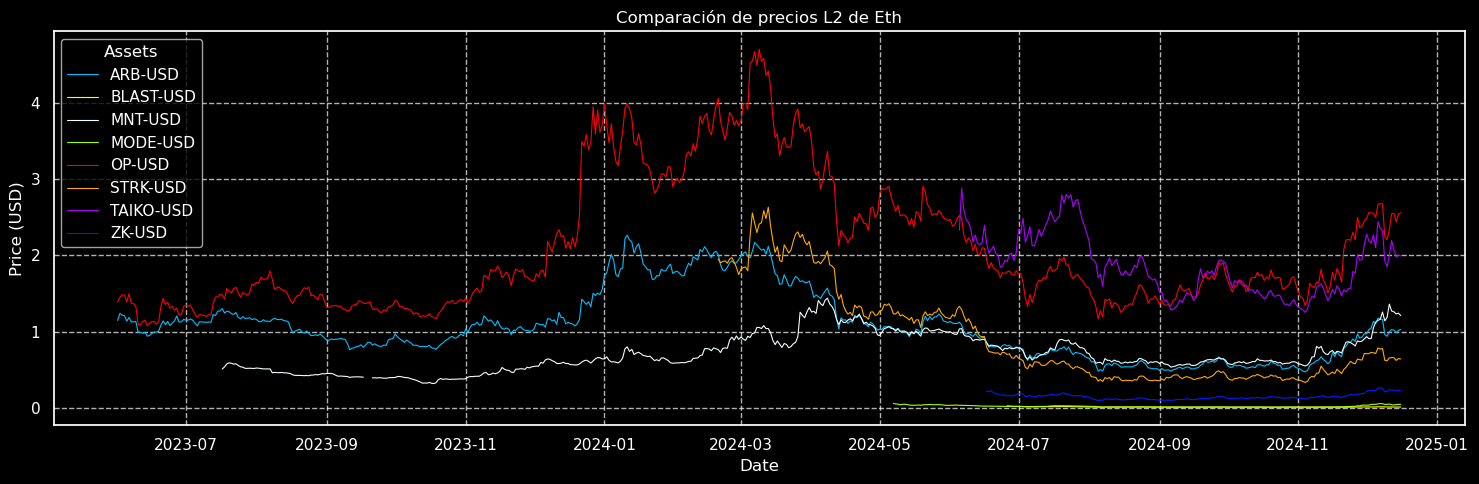

In [49]:
# Plot the data
#Define colors

colors = ['#00BFFF', '#ffff00', '#F0FFFF', '#aaff00','#FF0000','#ffaa00','#aa00ff', '#011efe']

for i, column in enumerate(data.columns):

    plt.plot(data.index, data[column], label=column, color=colors[i], linewidth=0.8)

plt.title("Comparación de precios L2 de Eth")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(title="Assets")
plt.grid(visible=True, which='major', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [50]:
df_op = data[['OP-USD']].copy()
df_op['Returns'] = df_op['OP-USD'].pct_change()
df_op.dropna(inplace=True)

total_return = (df_op['Returns'] + 1).prod() - 1
annualized_return = ( 1 + total_return) ** (252 / len(df_op)) - 1

print(f'Rendimiento Total: {total_return:.2%}') 
print(f'Rendimiento Anualizado: {annualized_return:.2%}') 

Rendimiento Total: 84.47%
Rendimiento Anualizado: 31.47%


In [51]:
returns = data.pct_change(fill_method=None)
total_return = (returns + 1).prod() - 1
total_return_formatted = total_return.apply(lambda x : f"{x:.2%}")

annualized_return = ( 1 + total_return) ** (252 / len(data)) - 1
annualized_return_formatted = annualized_return.apply(lambda x : f"{x:.2%}")

# Mostrar resultados
print("Total Return:")
print(total_return_formatted)
print("************")
print("Annualized Return:")
print(annualized_return_formatted)

Total Return:
Ticker
ARB-USD      -10.44%
BLAST-USD    -58.85%
MNT-USD      142.86%
MODE-USD     -19.48%
OP-USD        84.47%
STRK-USD     -67.11%
TAIKO-USD    -14.56%
ZK-USD         5.91%
dtype: object
************
Annualized Return:
Ticker
ARB-USD       -4.80%
BLAST-USD    -32.70%
MNT-USD       48.55%
MODE-USD      -9.21%
OP-USD        31.41%
STRK-USD     -39.10%
TAIKO-USD     -6.78%
ZK-USD         2.59%
dtype: object


In [52]:
# volatility = returns.std()
# a_volatility = volatility * np.sqrt(252)
# a_volatility

# a_volatility.plot(kind='bar', title="Volatilidad anual")
# plt.axhline(a_volatility.mean(), color='red')

# plt.show()

In [53]:
comulative_returns = (returns + 1).cumprod()
peak = comulative_returns.cummax()
drawdown = (comulative_returns - peak) / peak
max_drawdown = drawdown.min().round(2)
max_drawdown

Ticker
ARB-USD     -0.79
BLAST-USD   -0.71
MNT-USD     -0.63
MODE-USD    -0.82
OP-USD      -0.75
STRK-USD    -0.87
TAIKO-USD   -0.57
ZK-USD      -0.58
dtype: float64

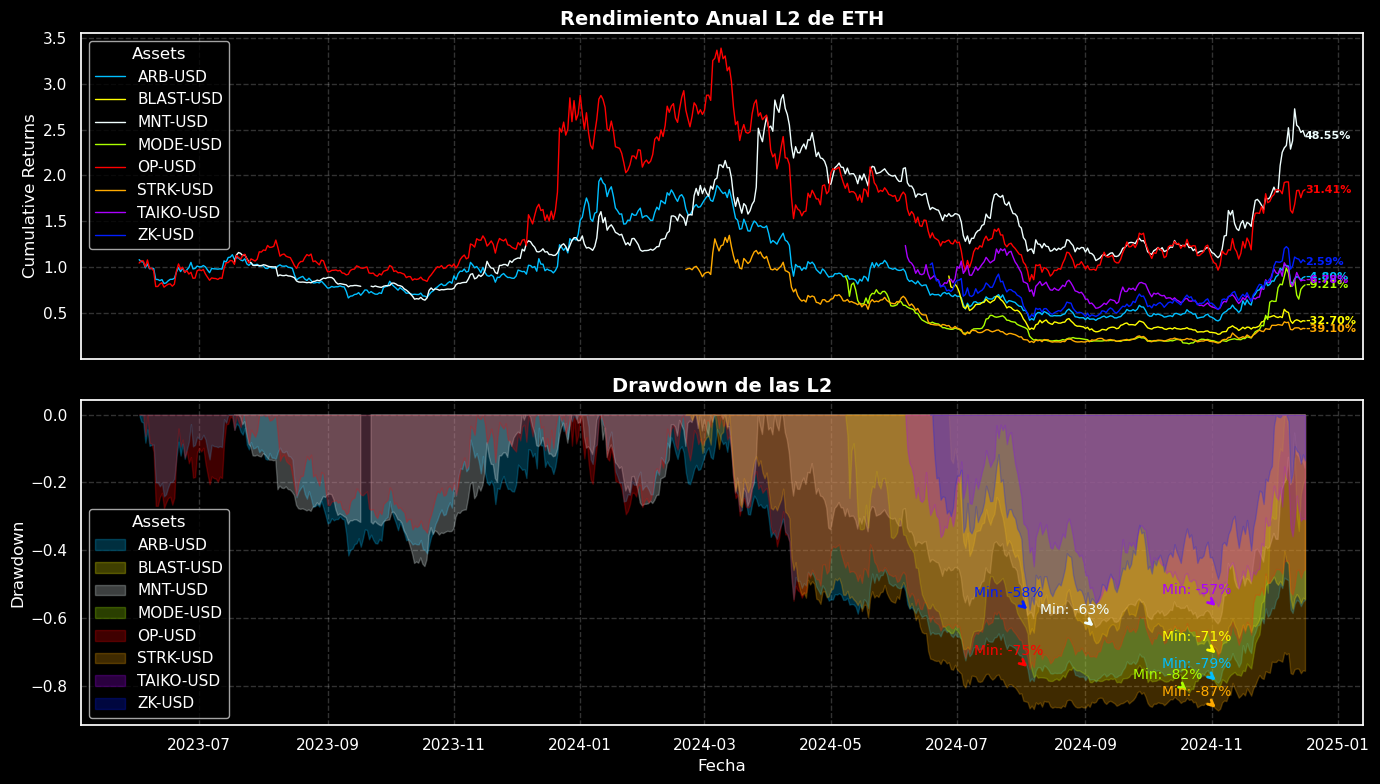

In [54]:
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [1,1]})

#colors = ['#00BFFF', '#ffff00', '#F0FFFF', '#aaff00','#FF0000','#ffaa00','#aa00ff', '#011efe']

# Rendimientos acumulativos
for i, column in enumerate(comulative_returns.columns):
    ax[0].plot(comulative_returns.index, comulative_returns[column], label=column, color=colors[i], linewidth=1)

    last_date = comulative_returns.index[-1]
    last_value = comulative_returns[column].iloc[-1]
    ax[0].text(last_date, last_value, f"{annualized_return[column]:.2%}",
               fontsize=8, color=colors[i], fontweight="bold", ha="left", va="center")

ax[0].set_title("Rendimiento Anual L2 de ETH", fontsize=14, fontweight="bold")
ax[0].set_ylabel("Cumulative Returns", fontsize=12)
ax[0].legend(title="Assets", loc="upper left")
ax[0].grid(True, linestyle='--', alpha=0.2)


# Drowdown
for i , column in enumerate(drawdown.columns):
    ax[1].fill_between(drawdown.index, drawdown[column],0 , 
                       color=colors[i], alpha=0.25, label=column)

ax[1].set_title("Drawdown de las L2", fontsize=14, fontweight='bold')
ax[1].set_xlabel("Fecha", fontsize=12)
ax[1].set_ylabel("Drawdown", fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.2)
ax[1].legend(title="Assets", loc="lower left")

# Mostar el máximo drawdown
for idx, (column, dd_value) in enumerate(max_drawdown.items()):
    valid_drawdown = drawdown[column].dropna()
    if not valid_drawdown.empty:
        min_index = valid_drawdown.idxmin()
        ax[1].annotate(f"Min: {dd_value:.0%}",
                       xy=(min_index, dd_value),
                       xytext=(-40, 10),
                       textcoords="offset points",
                       arrowprops=dict(arrowstyle="->", color=colors[idx], lw=2),
                       fontsize=10, color=colors[idx])


plt.tight_layout()
plt.show()